# __Particles Tracking__

### Problem statement

Once a flow is solved on a DFN, one compute the lagrangian trajectories of particles in the DFN <br/>
One also control the departure location of the particles.

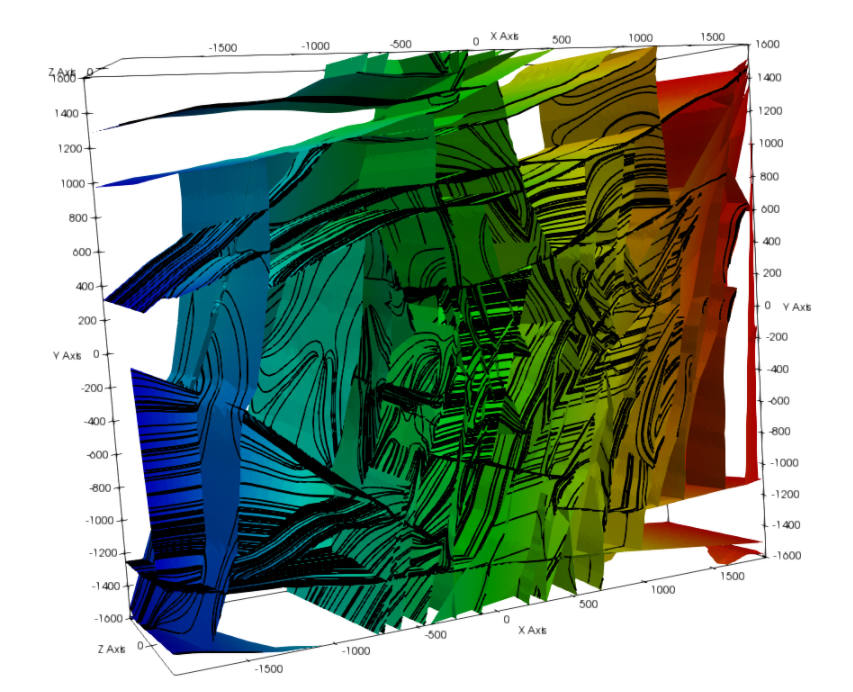

### What will you learn ?
- Generate particles
- Running particles
- Accessing to indicators
- Accessing to information on trajectories

### __Theorical background__ 

Basic knowledge about the advective transport inside an Eulerian flow.
We recall that velocities of particles are constant inside elements.

### DFN.Lab model

Requiered modules are __Basis__, __Flow__, __BoundaryCondition__, __Mesh__.<br>
This tutorial is focused on ParticlesTracking<br>
We use [_pyvista_](https://docs.pyvista.org) for embedded visualization of generated networks in our notebook.
<br>
We use [_matplotlib_](https://matplotlib.org) and [_mplstereonet_](https://github.com/joferkington/mplstereonet) to construct plot from networks analysis. <br/>

## Example

The current tutorial is built on the following example, similar to the tutorial 009.

In [1]:
import dfnlab.Basis as basis
import dfnlab.BoundaryCondition as bc
import dfnlab.Hydro as hydro
import dfnlab.Mesh as mesh 
import dfnlab.IO as io
import dfnlab.Flow as flow

import pyvista as pv
import os


the_system = basis.System()
the_system.buildParallelepiped(center=[0, 0, 0], L1=1.)
fnet = basis.DFN(the_system)
io.load_DFN_file(fnet,filename='sources/Ktest.disk', format="disk")
fnet.computeIntersections()

mesh = mesh.DFNMesh(fnet)  
mesh.loadMesh("sources/MeshExamples/KTestFine/")

boundaries = bc.DomainBoundaryCondition()
boundaries.setPermeameterCondition(fnet,10,3)

transmissivities = hydro.HydraulicProperties(fnet)
transmissivities.setConstant(1)

flow_system = flow.solveDarcyProblem(mesh,boundaries,transmissivities)

24
Linear system building 
Time: to build the system: 0.0803971 seconds. 
Taking account of the boundary conditions
Linear System solving
Time: to solve the system (intermediaire 1): 0.0256875 seconds. 
Time: to solve the system (intermediaire 2): 0.0010883 seconds. 
Time: to reconstruct the velocities: 0.0255758 seconds. 


## __Generation of particles__ 

Particles are generated  on object and fractures. <br>
In this example, the particles are launched on the bottom border, the list of object must be inserted in a list.



In [2]:
ListOfBorders = [fnet.getSystem().getBorder(4)]

The generation of particles is done through a generator object.

In [3]:
import dfnlab.ParticlesTracking as dfnPTrack

ParticlesSet =  dfnPTrack.ParticleSet(flow_system)
Generator = dfnPTrack.GeneratorOnDomainBoundary(mesh,ParticlesSet,ListOfBorders)

The method generate is used to determine the number of particles

In [4]:
Generator.generate(500)

At this stage, particles are created in the set

## __Running particles and access to informations__

In [5]:
ParticlesSet.nbParticles()

500

By defualt, position are only stored at intersections between fractures, to save the position at each elemnts, the next line must be executed

In [6]:
ParticlesSet.saveAllTrajectory()
ParticlesSet.run()

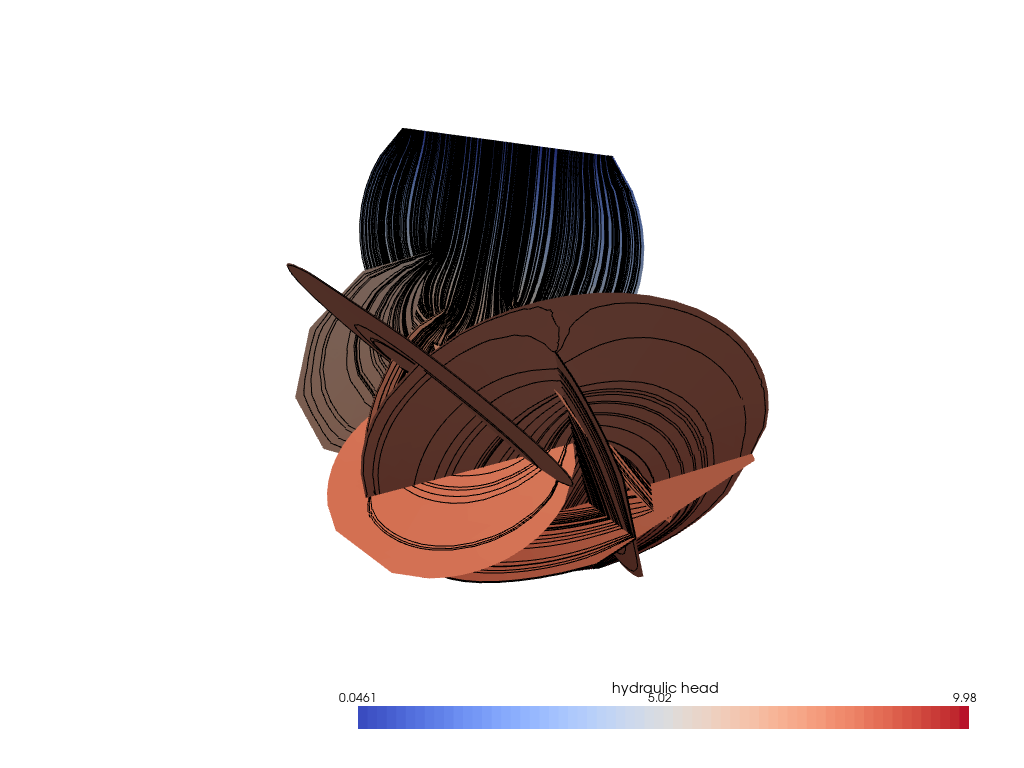

In [7]:
pathFolder = os.getcwd()+"/Tmp"

if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
from sources.functions import plot_FlowParticles

plot_FlowParticles(mesh, ParticlesSet, pathFolder+"/tutoParticlesFlow", pathFolder+"/tutoParticles",flow_system.head(),"hydraulic head")

To get access to indicator, the process is similar to the access of indicator in the flow.
Here an access to the time of flight statistics:


In [8]:
TimeOfFlights = ParticlesSet.getIndicators("timeOfFlight")

Some statistics can be obtained

In [9]:
TimeOfFlightsStat = TimeOfFlights.getStatisticalDistribution()

In [10]:
print(TimeOfFlightsStat.getMinimum())
print(TimeOfFlightsStat.getMaximum())
print(TimeOfFlightsStat.getMean())
print(TimeOfFlightsStat.getMedian())
print(TimeOfFlightsStat.getStandardDeviation())
print(TimeOfFlightsStat.getVariance())
print(TimeOfFlightsStat.getSkewness())
print(TimeOfFlightsStat.getKurtosis())

0.0015211630979788486
0.24015802221163632
0.00455626948644925
0.0027163846221836775
0.011842122290642465
0.00014023586034653113
6.209051743457743e-06
1.8987462538250228e-08


In [11]:
LengthfFlights = ParticlesSet.getIndicators("lengthOfFlight")
LengthfFlightsStat = LengthfFlights.getStatisticalDistribution()


print(LengthfFlightsStat.getMinimum())
print(LengthfFlightsStat.getMaximum())
print(LengthfFlightsStat.getMean())
print(LengthfFlightsStat.getMedian())
print(LengthfFlightsStat.getStandardDeviation())
print(LengthfFlightsStat.getVariance())
print(LengthfFlightsStat.getSkewness())
print(LengthfFlightsStat.getKurtosis())

1.0523216017238144
3.508072715501214
1.3188038811370788
1.2627487869459506
0.23265927468817957
0.05413033809842979
0.0625511824018735
1.0677065667637766


In [12]:
import matplotlib.pyplot as plt

The computation of probability density function of the statistics is also available:

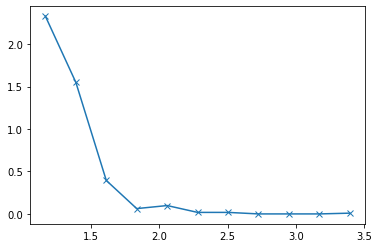

In [13]:
X,Pdf = LengthfFlightsStat.getPDF()
plt.plot(X,Pdf,'-x')

### __Access to particles__

Particles can be accessed through a loop on the set:

In [14]:
for P in ParticlesSet:
    P.getPosition()

Or access directly

In [15]:
Particle = ParticlesSet.getParticle(45)

Access to the number of position of the particle

In [16]:
print(Particle.getNumberOfPositionInTrajectory())

114


Then, you can access to information of each positions, such as poistion, velocity, elements, extras, indicators ...

In [17]:
Position = Particle.getPositionInformation(14)

In [18]:
print(Position.getTime())
print(Position.getPosition())

0.00020653457404171737
[-0.14894695  0.02311279 -0.38448199]


also, you can access through an iterator to all positions of the particle

In [19]:
for Position in Particle:
    pos  =Position

The list of all indicators and methods available for the set of particles, particles and position of particles are listed in the documentation.